In [125]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [126]:
data=pd.read_csv("CovidCases.csv")
data.shape

(165, 2)

In [127]:
data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)
data=data.set_index(['Date'])

print(data.head())
print(data.tail())

            Cases
Date             
2020-02-29      1
2020-03-03      1
2020-03-04      4
2020-03-05      7
2020-03-06      5
            Cases
Date             
2020-08-09     68
2020-08-10     57
2020-08-11     35
2020-08-12     40
2020-08-13     92


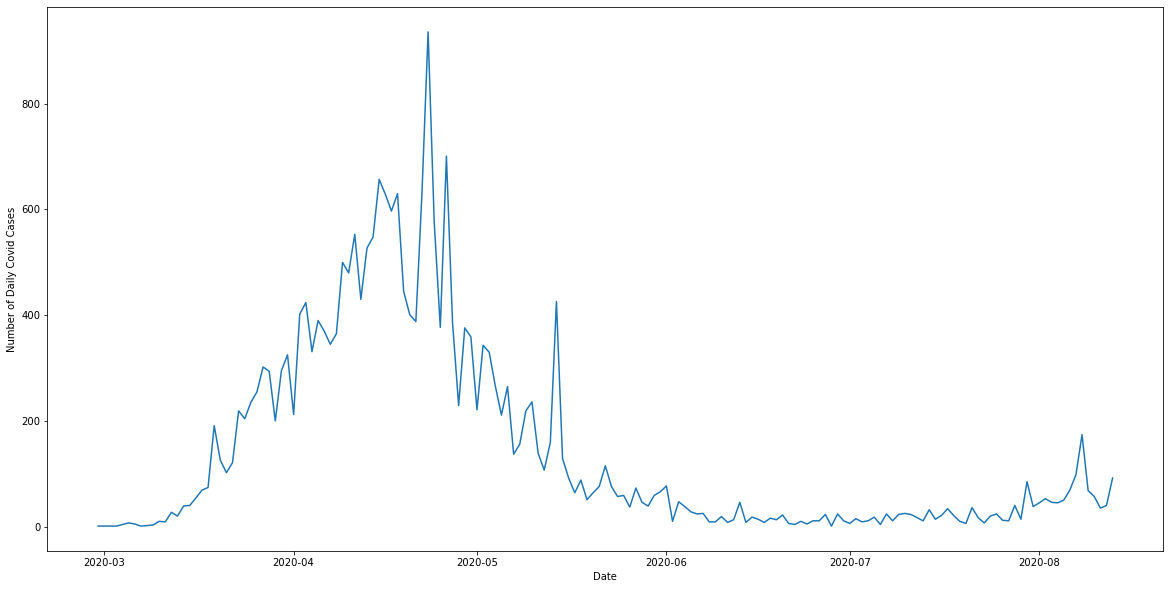

In [128]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Number of Daily Covid Cases")
plt.plot(data)

In [129]:
rolmean=data.rolling(window=7).mean()
rolstd=data.rolling(window=7).std()
print(rolmean.head(15))
print(rolstd.head(15))

                Cases
Date                 
2020-02-29        NaN
2020-03-03        NaN
2020-03-04        NaN
2020-03-05        NaN
2020-03-06        NaN
2020-03-07        NaN
2020-03-08   3.000000
2020-03-09   3.285714
2020-03-10   4.571429
2020-03-11   5.285714
2020-03-12   8.142857
2020-03-13  10.285714
2020-03-14  15.714286
2020-03-15  21.142857
2020-03-16  28.428571
                Cases
Date                 
2020-02-29        NaN
2020-03-03        NaN
2020-03-04        NaN
2020-03-05        NaN
2020-03-06        NaN
2020-03-07        NaN
2020-03-08   2.380476
2020-03-09   2.214670
2020-03-10   3.101459
2020-03-11   3.498299
2020-03-12   8.989412
2020-03-13   9.860938
2020-03-14  13.634690
2020-03-15  14.780940
2020-03-16  16.781509


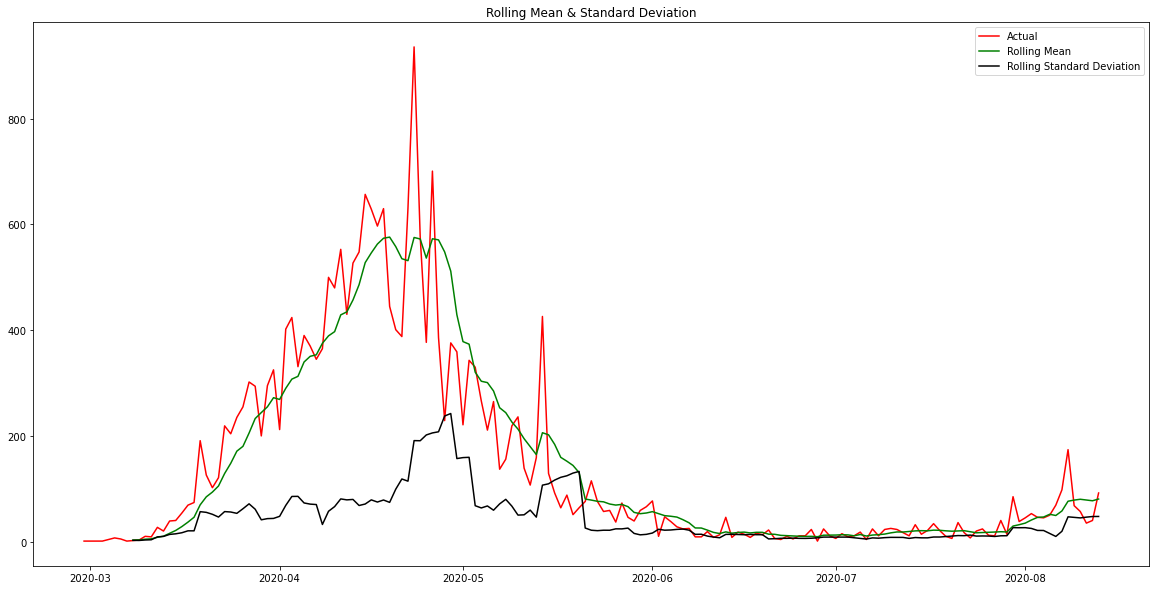

In [130]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [131]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Cases'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -1.470805
p-value                   0.547901
Lags Used                 2.000000
No. of Obs              162.000000
Critical Value (1%)      -3.471374
Critical Value (5%)      -2.879552
Critical Value (10%)     -2.576373
dtype: float64


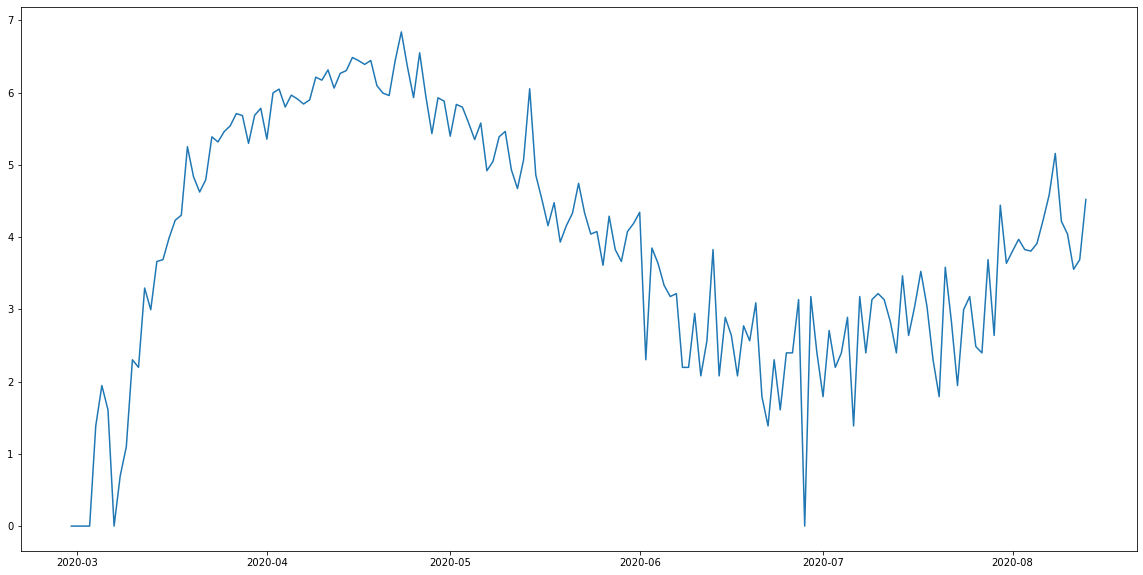

In [132]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

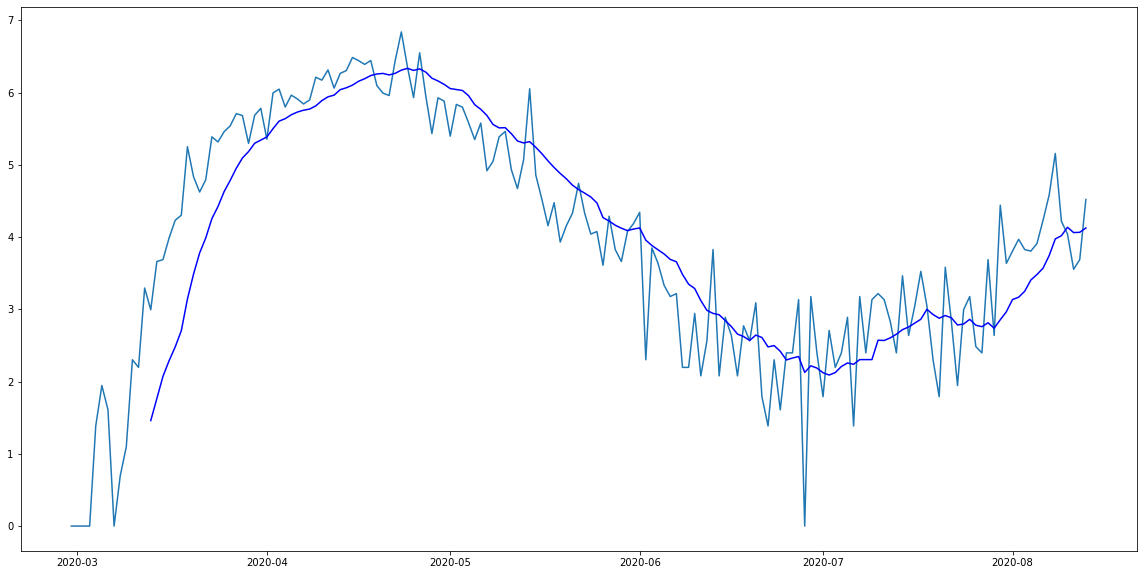

In [133]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [134]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Cases
Date,
2020-02-29,NaN
2020-03-03,NaN
2020-03-04,NaN
2020-03-05,NaN
2020-03-06,NaN
2020-03-07,NaN
2020-03-08,NaN
2020-03-09,NaN
2020-03-10,NaN


In [135]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Cases
Date,
2020-03-13,1.535334
2020-03-14,1.897866
2020-03-15,1.615778
2020-03-16,1.698991
2020-03-17,1.753431


In [136]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Cases'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

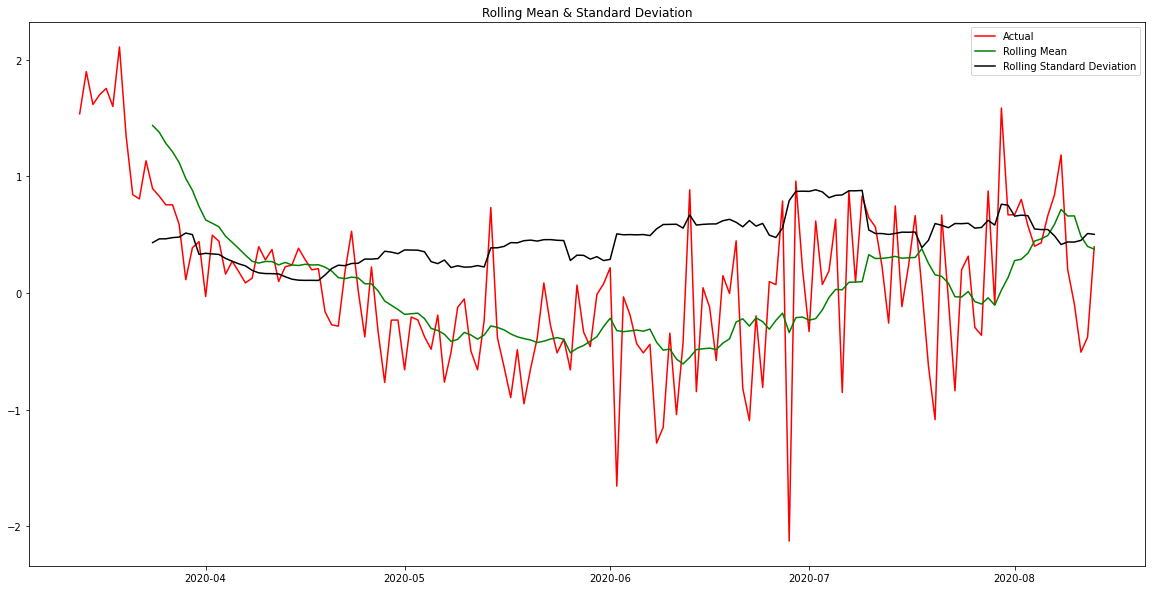

Dickey-Fuller Test: 
Test Statistic           -2.667900
p-value                   0.079760
Lags Used                13.000000
No. of Obs              140.000000
Critical Value (1%)      -3.477945
Critical Value (5%)      -2.882416
Critical Value (10%)     -2.577902
dtype: float64


In [137]:
stationarity(data_log_diff)

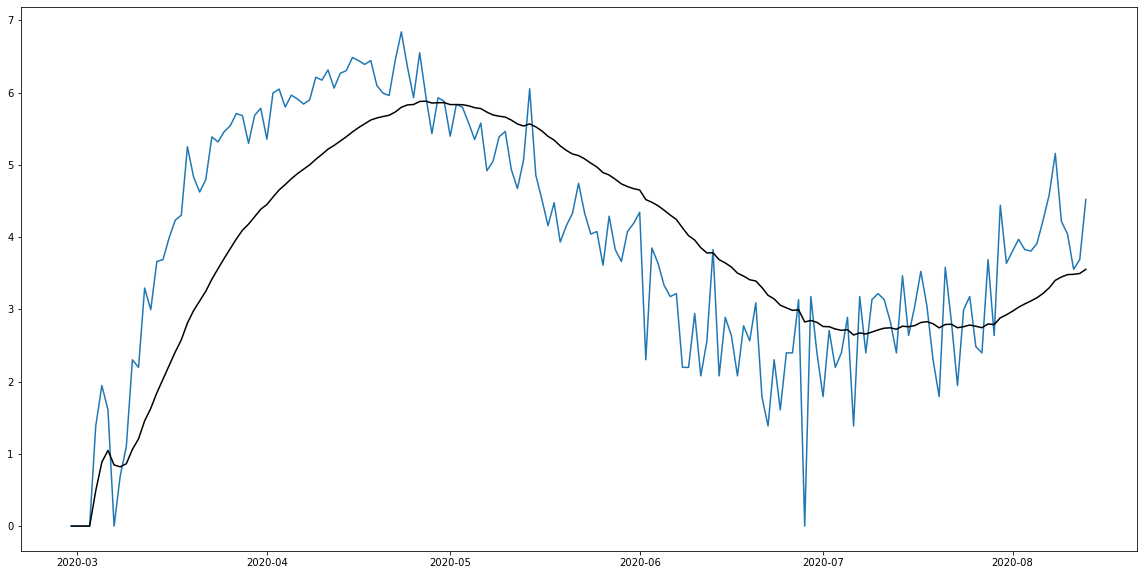

In [138]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

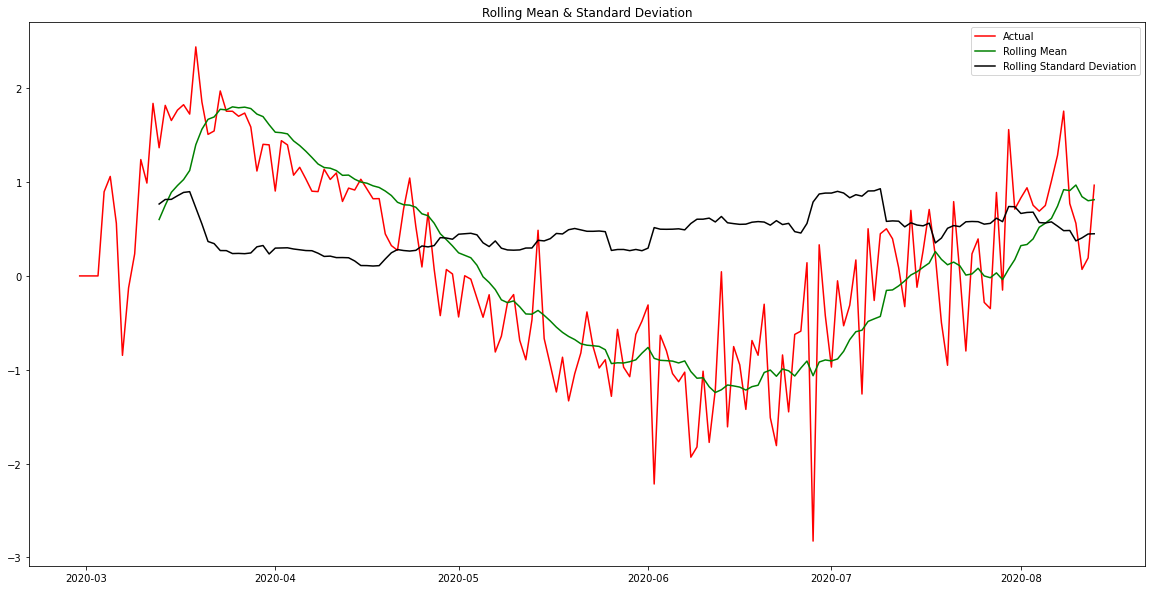

Dickey-Fuller Test: 
Test Statistic           -2.013297
p-value                   0.280774
Lags Used                14.000000
No. of Obs              150.000000
Critical Value (1%)      -3.474715
Critical Value (5%)      -2.881009
Critical Value (10%)     -2.577151
dtype: float64


In [139]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

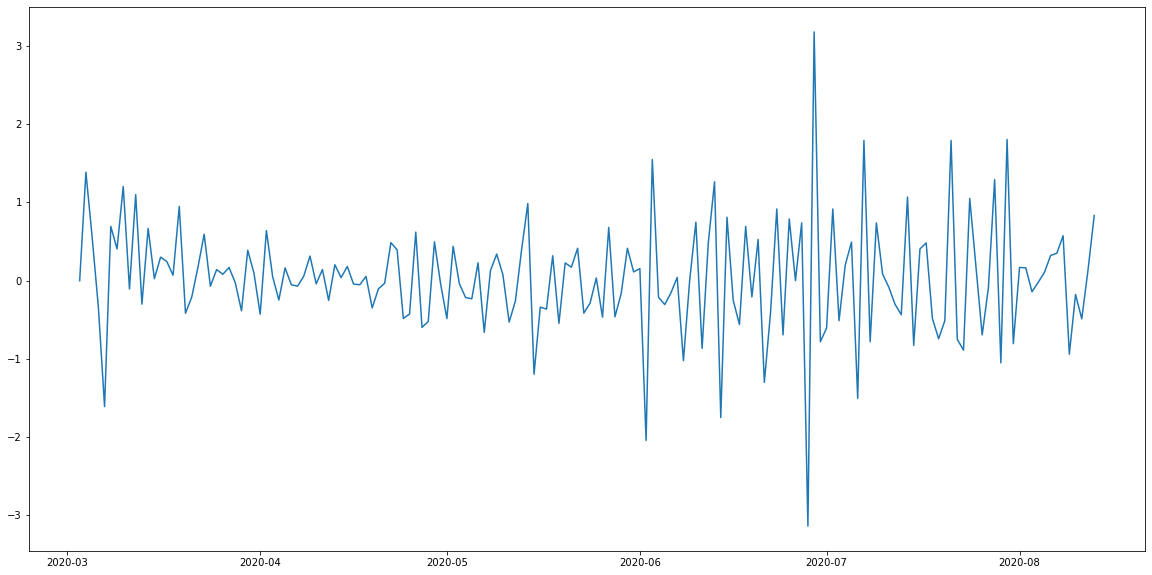

In [140]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

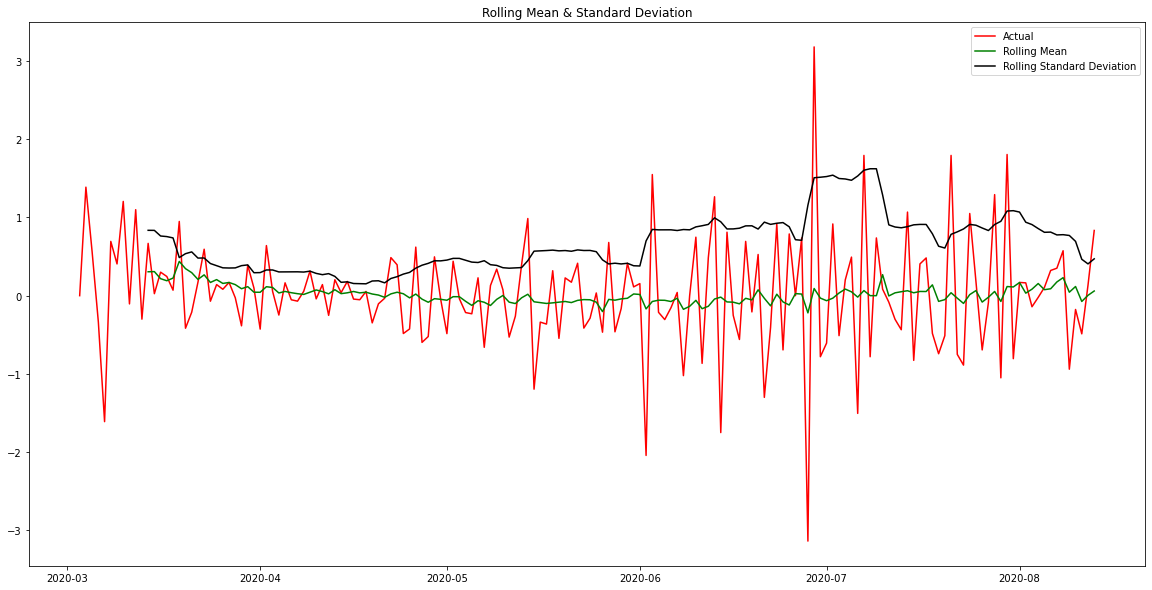

Dickey-Fuller Test: 
Test Statistic           -3.695738
p-value                   0.004174
Lags Used                13.000000
No. of Obs              150.000000
Critical Value (1%)      -3.474715
Critical Value (5%)      -2.881009
Critical Value (10%)     -2.577151
dtype: float64


In [141]:
data_shift=data_shift.dropna()
stationarity(data_shift)

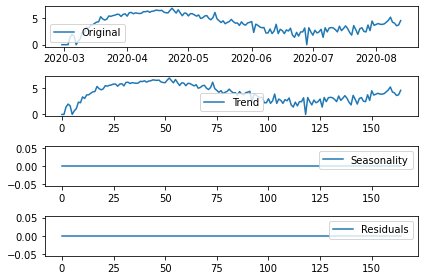

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log.values, freq=1)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [143]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

Text(0.5, 1.0, 'Autocorrelation Function')

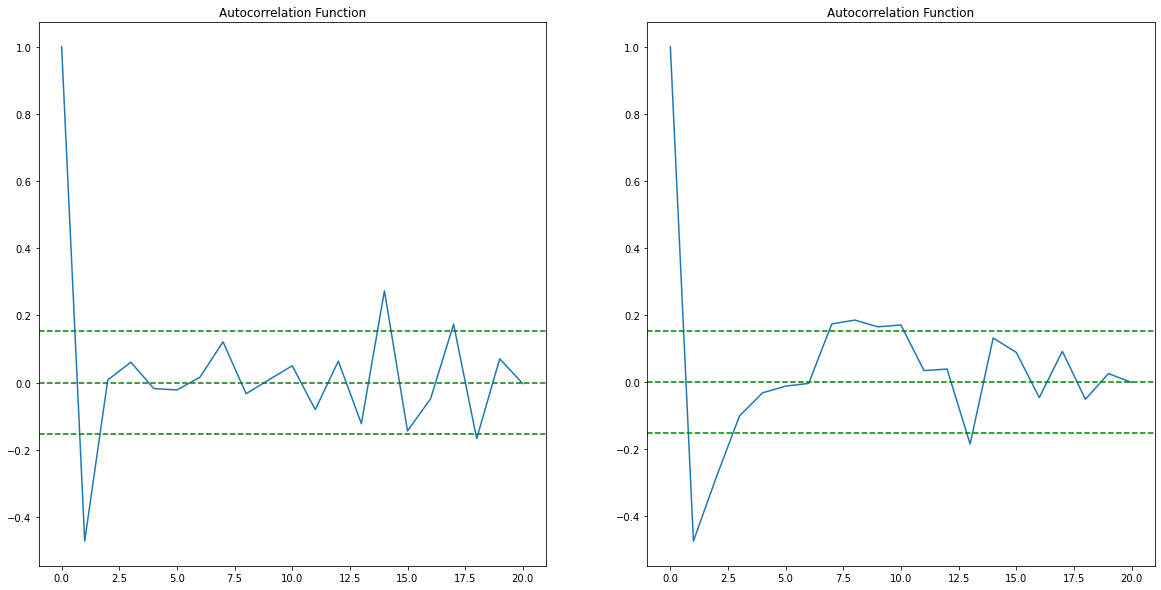

In [144]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plotting ARIMA model


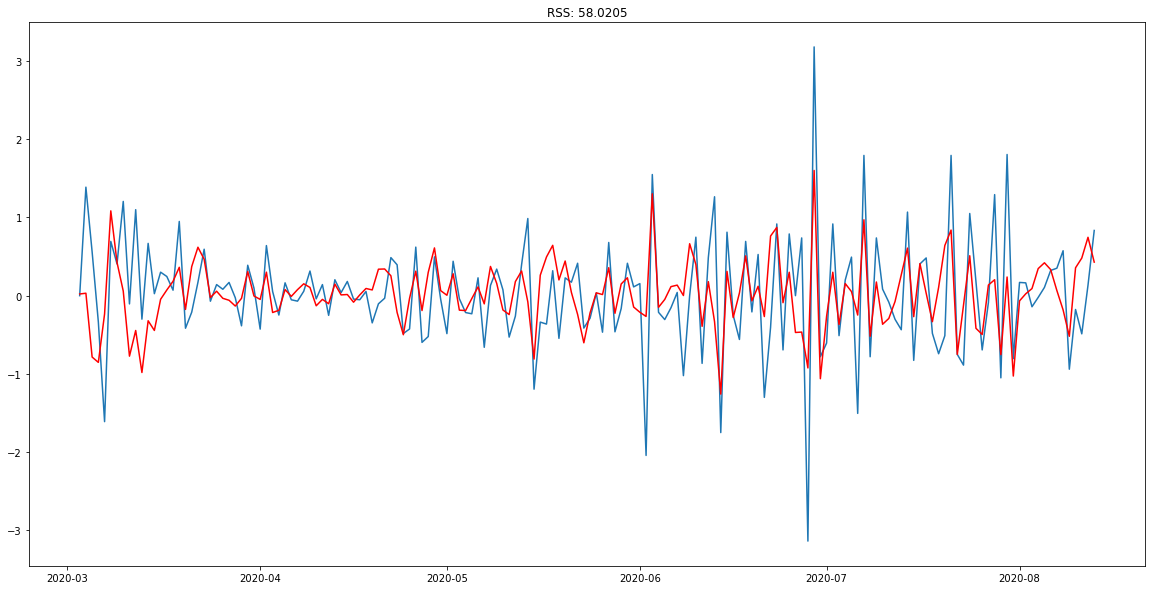

In [145]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Cases'])**2))
print('plotting ARIMA model')

In [146]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Date
2020-03-03    0.021337
2020-03-04    0.031156
2020-03-05   -0.784146
2020-03-06   -0.852452
2020-03-07   -0.234257
dtype: float64


In [147]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Date
2020-03-03    0.021337
2020-03-04    0.052494
2020-03-05   -0.731652
2020-03-06   -1.584104
2020-03-07   -1.818361
dtype: float64


In [148]:
predictions_log=pd.Series(data_log['Cases'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

predictions_log=pd.Series(data_log['Cases'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Date
2020-02-29    0.000000
2020-03-03    0.021337
2020-03-04    0.052494
2020-03-05   -0.731652
2020-03-06   -1.584104
dtype: float64

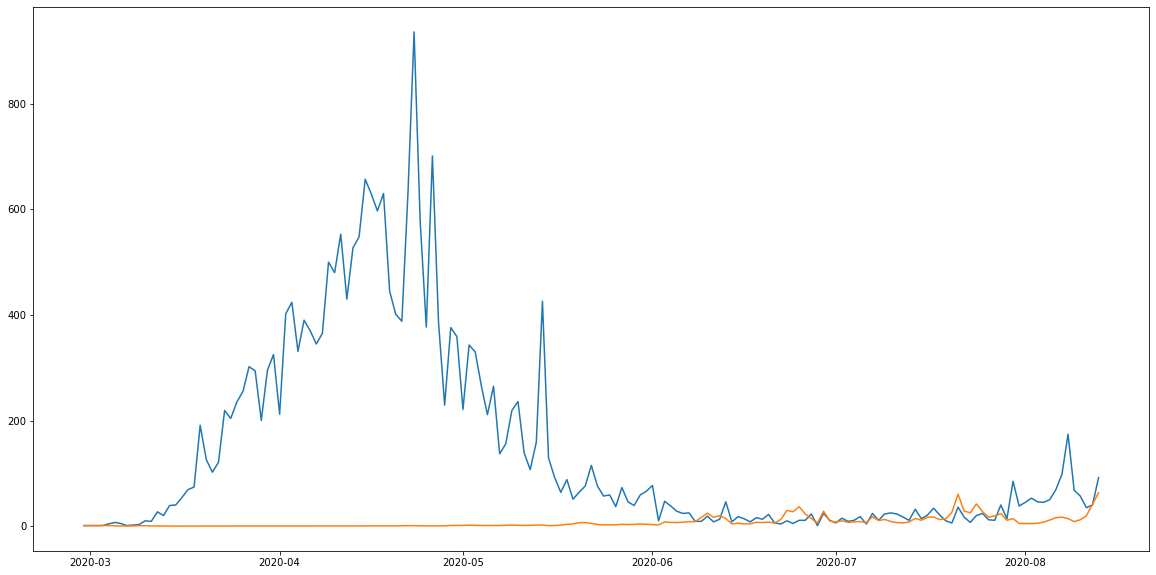

In [149]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

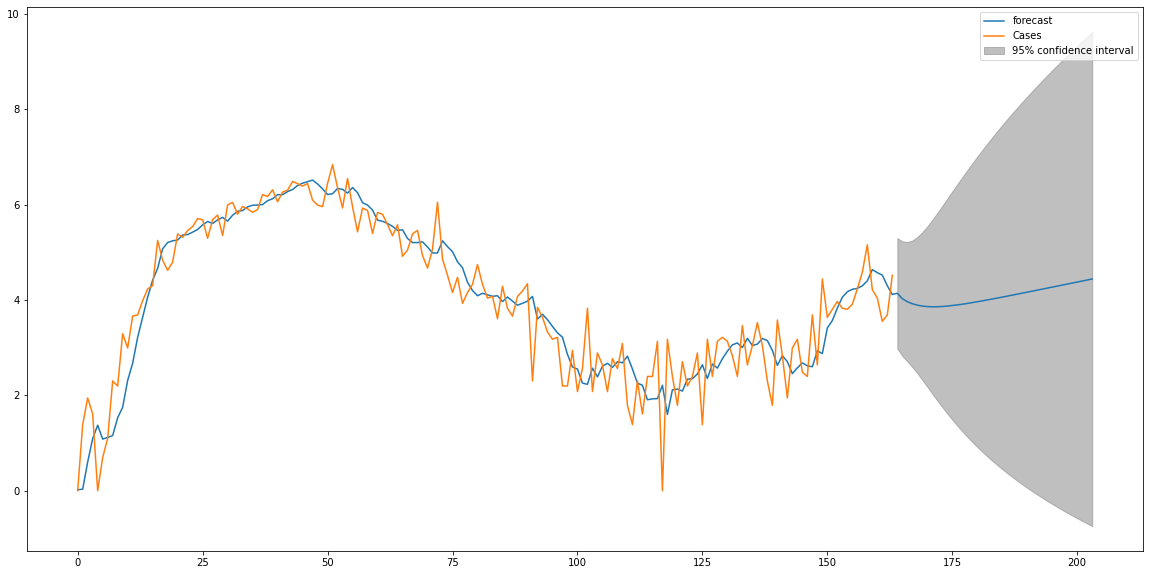

In [150]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [151]:
results.forecast(steps=120)

(array([4.14322891, 4.03001817, 3.96687161, 3.92375299, 3.89413619,
        3.8749648 , 3.8640693 , 3.85975546, 3.86067894, 3.86577034,
        3.8741787 , 3.88522678, 3.89837563, 3.91319633, 3.92934753,
        3.94655759, 3.96461031, 3.98333366, 4.0025907 , 4.02227247,
        4.04229225, 4.06258103, 4.0830839 , 4.10375713, 4.12456595,
        4.14548267, 4.16648526, 4.18755619, 4.2086815 , 4.2298501 ,
        4.25105315, 4.2722836 , 4.29353587, 4.31480551, 4.33608896,
        4.3573834 , 4.3786866 , 4.39999676, 4.42131247, 4.44263258,
        4.4639562 , 4.48528262, 4.50661126, 4.52794167, 4.54927349,
        4.57060643, 4.59194026, 4.61327479, 4.6346099 , 4.65594545,
        4.67728136, 4.69861756, 4.71995398, 4.74129059, 4.76262733,
        4.78396419, 4.80530114, 4.82663817, 4.84797525, 4.86931238,
        4.89064954, 4.91198673, 4.93332395, 4.95466118, 4.97599843,
        4.99733569, 5.01867296, 5.04001024, 5.06134752, 5.08268481,
        5.1040221 , 5.1253594 , 5.14669669, 5.16